In [1]:
import openslide
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
# Open .svs file
slide = openslide.OpenSlide("../files/svs_public/TCGA-3C-AALI-01Z-00-DX1.F6E9A5DF-D8FB-45CF-B4BD-C6B76294C291.svs")

# Print information
print("Dimensions:", slide.dimensions)
print("Levels:", slide.level_count)
print("Level dimensions:", slide.level_dimensions)
print("Objective Power:", slide.properties.get("aperio.AppMag"))
print("Level downsamples:", slide.level_downsamples)
print("Mpp-X:", slide.properties.get("openslide.mpp-x"))  # X directional microns per pixel
print("Mpp-Y:", slide.properties.get("openslide.mpp-y"))  # Y directional microns per pixel

Dimensions: (101184, 74432)
Levels: 4
Level dimensions: ((101184, 74432), (25296, 18608), (6324, 4652), (3162, 2326))
Objective Power: 40.000000
Level downsamples: (1.0, 4.0, 16.0, 32.0)
Mpp-X: 0.25
Mpp-Y: 0.25


In [7]:
# Print pixel resolution for every level
for i in range(slide.level_count):
    level_size = slide.level_dimensions[i]  # (width, height)
    print(f"Level {i}: size = {level_size}")

Level 0: size = (101184, 74432)
Level 1: size = (25296, 18608)
Level 2: size = (6324, 4652)
Level 3: size = (3162, 2326)


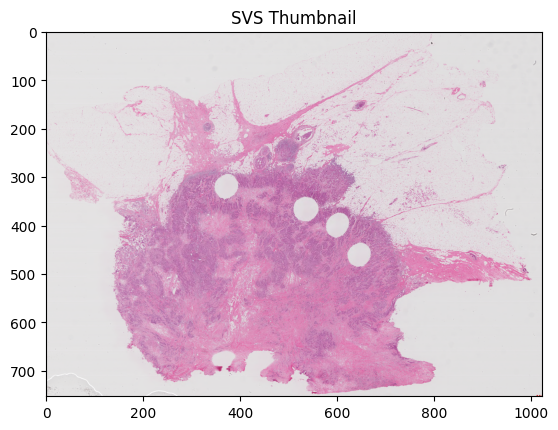

In [8]:
# Read thumbnail for quick check
thumbnail = slide.get_thumbnail((1024, 1024))

# Show thumbnail
plt.figure()
plt.imshow(thumbnail)
plt.title("SVS Thumbnail")
#plt.axis("off")
plt.show()

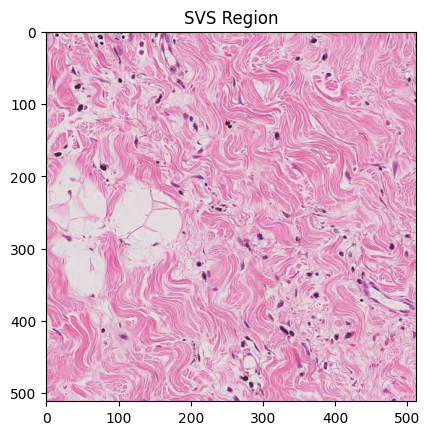

In [21]:
# Read patch of WSI
# location: (x, y) on level 0 image.
# level: patch will show on this image. 
# Given the location, the function convert it to the level you assign.
# size: image size on the level you assign

region = slide.read_region(location=(30000, 20000), level=1, size=(512, 512))
plt.figure()
plt.imshow(region)
plt.title("SVS Region")
#plt.axis("off")
plt.show()

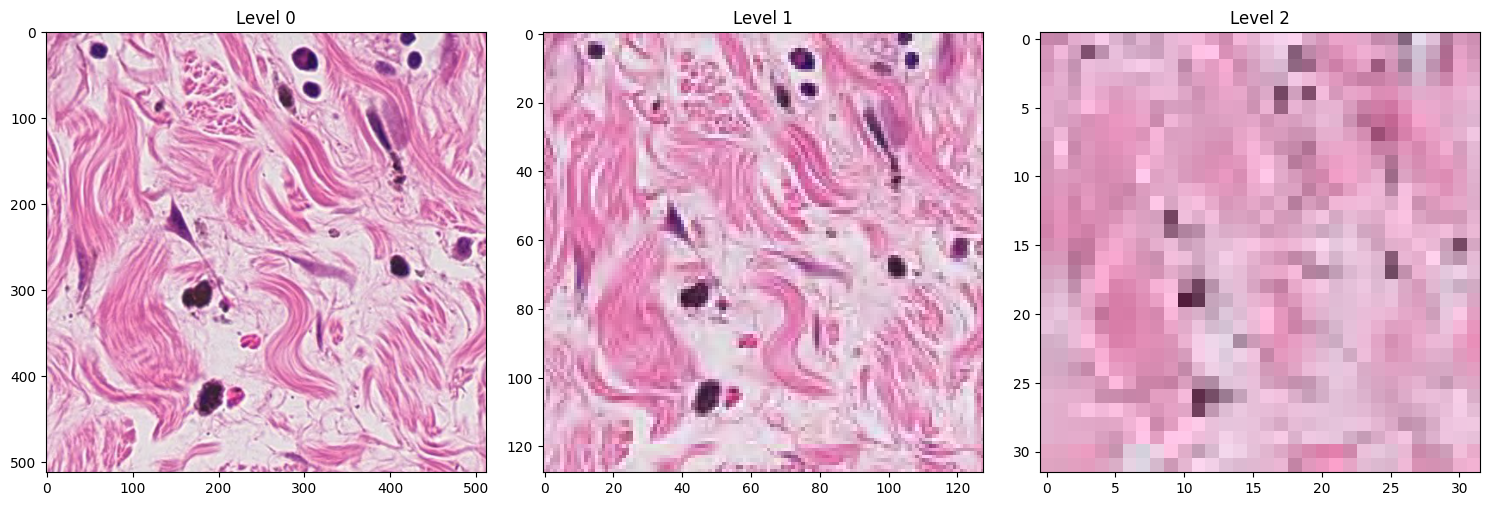

In [ ]:
# Patch area (x, y) in level 0 image
x0, y0 = 30000, 20000
patch_size = 512

# Extract Level 0 patch
patch0 = slide.read_region((x0, y0), level=0, size=(patch_size, patch_size)).convert("RGB")

# Extract Level 1 patch
downsample1 = slide.level_downsamples[1]
size1 = (int(patch_size / downsample1), int(patch_size / downsample1))
patch1 = slide.read_region((x0, y0), level=1, size=size1).convert("RGB")

# Extract Level 2 patch
downsample2 = slide.level_downsamples[2]
size2 = (int(patch_size / downsample2), int(patch_size / downsample2))
patch2 = slide.read_region((x0, y0), level=2, size=size2).convert("RGB")

# Resize patch
#patch1_resized = patch1.resize((patch_size, patch_size))
#patch2_resized = patch2.resize((patch_size, patch_size))

# Show patch
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(patch0)
axs[0].set_title("Level 0")
axs[1].imshow(patch1)
axs[1].set_title("Level 1")
axs[2].imshow(patch2)
axs[2].set_title("Level 2")

# No axis
#for ax in axs:
#    ax.axis('off')

plt.tight_layout()
plt.show()

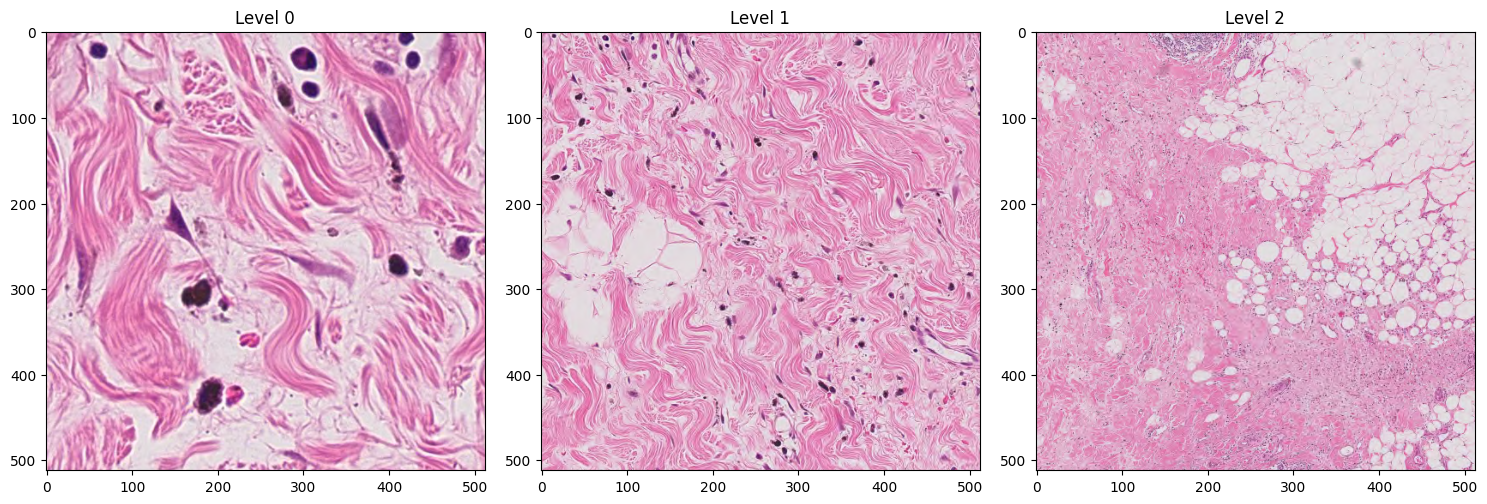

In [22]:
# Patch area (x, y) in level 0 image
x0, y0 = 30000, 20000
patch_size = 512

# Extract Level 0 patch
patch0 = slide.read_region((x0, y0), level=0, size=(patch_size, patch_size)).convert("RGB")

# Extract Level 1 patch
downsample1 = slide.level_downsamples[1]
patch1 = slide.read_region((x0, y0), level=1, size=(patch_size, patch_size)).convert("RGB")

# Extract Level 2 patch
downsample2 = slide.level_downsamples[2]
patch2 = slide.read_region((x0, y0), level=2, size=(patch_size, patch_size)).convert("RGB")

# Show patch
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(patch0)
axs[0].set_title("Level 0")
axs[1].imshow(patch1)
axs[1].set_title("Level 1")
axs[2].imshow(patch2)
axs[2].set_title("Level 2")

# No axis
#for ax in axs:
#    ax.axis('off')

plt.tight_layout()
plt.show()